In [2]:
import pandas as pd


veri = pd.read_csv('filmtv_movies.csv')
excel_adı = 'filmtv_movies.xlsx'  
veri.to_excel(excel_adı, index=False)




In [6]:
import pandas as pd



df = pd.read_excel('filmtv_movies.xlsx')


film_adi = input("Film adını girin: ")


film_verileri = df[df['title'] == film_adi]


if film_verileri.empty:
    print(f"{film_adi} adlı film veri setinde bulunamadı.")
else:
    print("\nFilm Bilgileri:")
    print("Film ID: ", film_verileri['filmtv_id'].values[0])
    print("Yıl: ", film_verileri['year'].values[0])
    print("Tür: ", film_verileri['genre'].values[0])
    print("Süre: ", film_verileri['duration'].values[0])
    print("Ülke: ", film_verileri['country'].values[0])
    print("Yönetmen: ", film_verileri['directors'].values[0])
    print("Oyuncular: ", film_verileri['actors'].values[0])
    print("Ortalama Oy: ", film_verileri['avg_vote'].values[0])
    print("Eleştirmen Oyu: ", film_verileri['critics_vote'].values[0])
    print("Halk Oyu: ", film_verileri['public_vote'].values[0])
    print("Toplam Oy Sayısı: ", film_verileri['total_votes'].values[0])
    print("Açıklama: ", film_verileri['description'].values[0])
    print("Notlar: ", film_verileri['notes'].values[0])
    print("Mizah: ", film_verileri['humor'].values[0])
    print("Ritim: ", film_verileri['rhythm'].values[0])
    print("Çaba: ", film_verileri['effort'].values[0])
    print("Gerilim: ", film_verileri['tension'].values[0])
    print("Erotizm: ", film_verileri['erotism'].values[0])



Film Bilgileri:
Film ID:  2
Yıl:  1982
Tür:  Animation
Süre:  76
Ülke:  United States
Yönetmen:  David Detiege, Art Davis, Bill Perez
Oyuncular:  nan
Ortalama Oy:  7.7
Eleştirmen Oyu:  8.0
Halk Oyu:  7.0
Toplam Oy Sayısı:  22
Açıklama:  With two protruding front teeth, a slightly sly air and a certain penchant for carrots, Bugs Bunny is one of the most popular cartoon heroes, especially in the United States. In this anthology, in addition to the bunny, there are other heroes of Warner cartoons: Sylvester and Tweety, engaged in a merciless but useless hunt, Daffy Duck (the duck who over time imitates Walt Disney's Donald Duck more and more) and others yet.
Notlar:  These are many small independent stories, which can be viewed individually. The anthology also includes "One Froggy Evening", one of the masterpieces of designer Chuck Jones.
Mizah:  3
Ritim:  3
Çaba:  0
Gerilim:  0
Erotizm:  0



En Yakın 5 Film:

Film ID: 44604
Film Adı:  Beginners
Ortalama Oy:  6.9
Ülke:  United States
Tür:  Drama


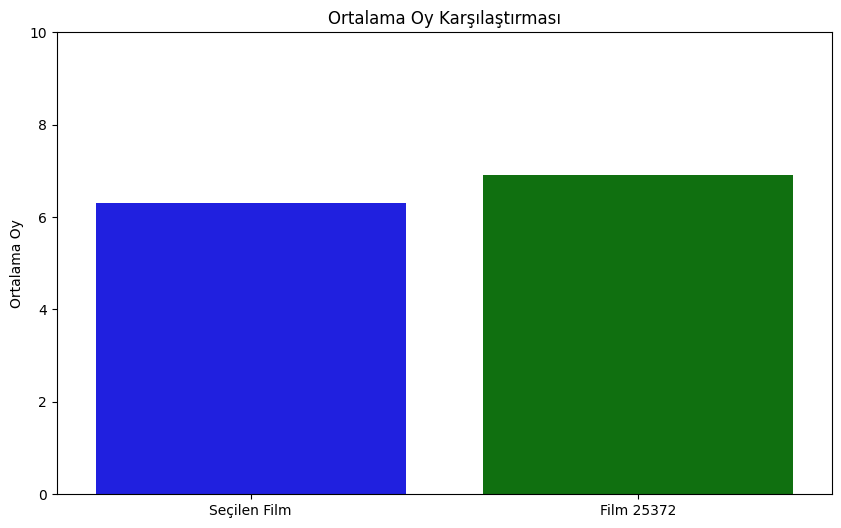


Film ID: 15437
Film Adı:  Absolute Power
Ortalama Oy:  7.4
Ülke:  United States
Tür:  Thriller


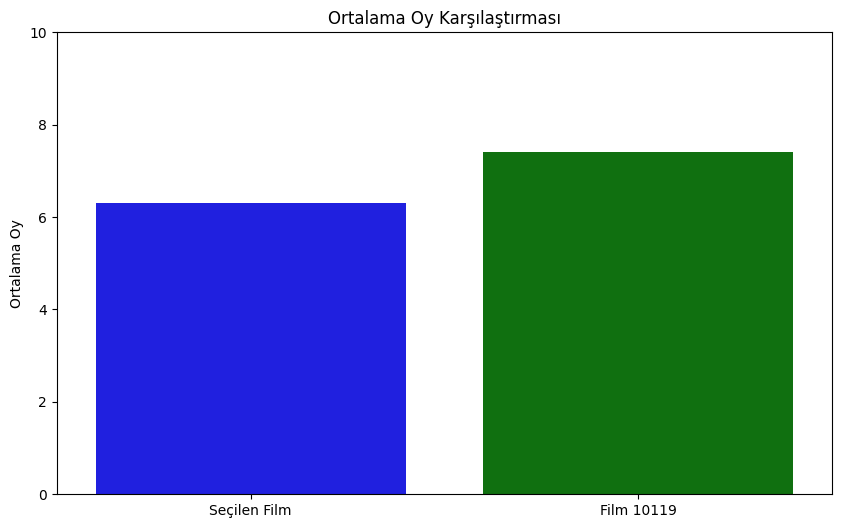


Film ID: 15970
Film Adı:  Absolute Strangers
Ortalama Oy:  8.0
Ülke:  United States
Tür:  Drama


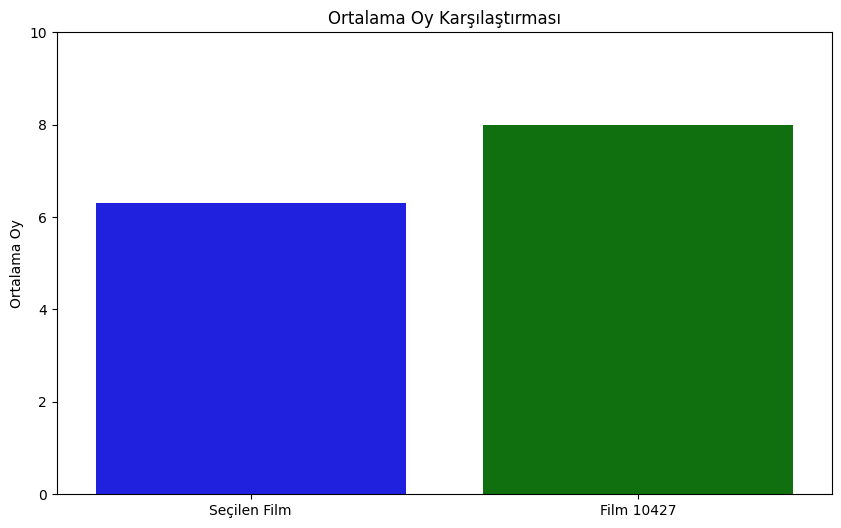


Film ID: 42758
Film Adı:  Absolute Zero
Ortalama Oy:  3.7
Ülke:  Canada
Tür:  Action


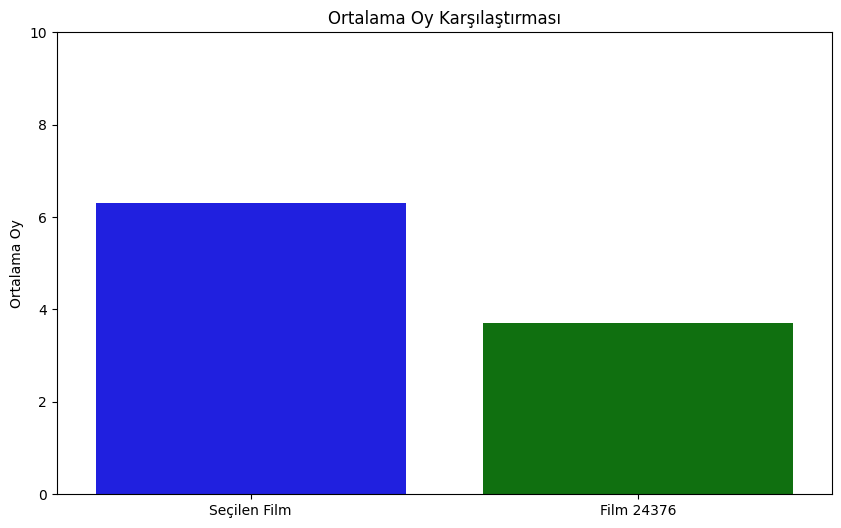


Film ID: 71521
Film Adı:  Adult Beginners
Ortalama Oy:  5.3
Ülke:  United States
Tür:  Comedy


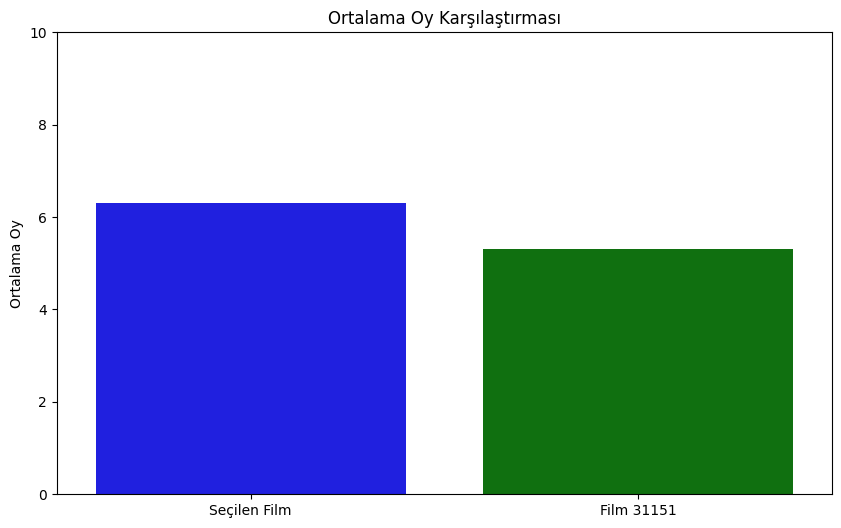

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


df = pd.read_excel('filmtv_movies.xlsx')


film_adi = input("Film adını girin: ")


film_verileri = df[df['title'] == film_adi]


if film_verileri.empty:
    print(f"{film_adi} adlı film veri setinde bulunamadı.")
else:
    selected_features = film_verileri[['avg_vote', 'country', 'genre']]

    
    df['selected_avg_vote'] = selected_features['avg_vote'].values[0]
    df['selected_country'] = selected_features['country'].values[0]
    df['selected_genre'] = selected_features['genre'].values[0]

    
    vectorizer = CountVectorizer()
    feature_matrix = vectorizer.fit_transform(df[['title', 'selected_avg_vote', 'selected_country', 'selected_genre']].astype('U').agg(' '.join, axis=1))

    # Cosine similarity matrisini hesaplayın
    cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

    # Kullanıcının girdiği film ile diğer filmler arasındaki benzerlikleri bulun
    similarities = cosine_sim[film_verileri.index.values[0]]

    # Benzerlik skorlarına göre sıralayın
    similar_movies_indices = np.argsort(similarities)[::-1]

    # En yakın 5 filmin bilgilerini ve grafikleri yazdırın
    print("\nEn Yakın 5 Film:")
    for index in similar_movies_indices[1:6]:  # İlk film kendisi olduğu için 1'den başlıyoruz
        movie_info = df.iloc[index]
        print(f"\nFilm ID: {movie_info['filmtv_id']}")
        print("Film Adı: ", movie_info['title'])
        print("Ortalama Oy: ", movie_info['avg_vote'])
        print("Ülke: ", movie_info['country'])
        print("Tür: ", movie_info['genre'])

        # Görselleştirme için bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x=['Seçilen Film', f"Film {index - 1}"],
                    y=[selected_features['avg_vote'].values[0], movie_info['avg_vote']],
                    palette=['blue', 'green'])
        plt.title('Ortalama Oy Karşılaştırması')
        plt.ylabel('Ortalama Oy')
        plt.ylim(0, 10)  # 0 ile 10 arasında değer alır
        plt.show()


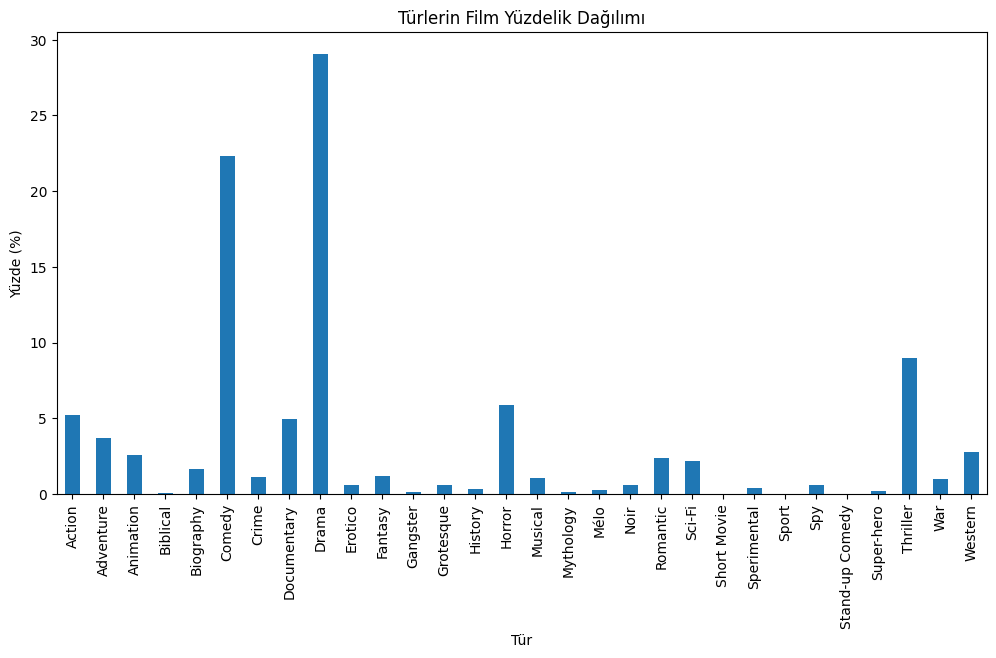

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setinizi yükleyin (örnek olarak Excel dosyası kullanıldı)
df = pd.read_excel('filmtv_movies.xlsx')

# 'genre' sütununa göre gruplayın ve her türün filmlerinin sayısını alın
genre_counts = df.groupby('genre').size()

# Toplam film sayısına göre yüzdelik oranları hesaplayın
genre_percentages = genre_counts / genre_counts.sum() * 100

# Bar plot oluşturun
plt.figure(figsize=(12, 6))
genre_percentages.plot(kind='bar')
plt.title('Türlerin Film Yüzdelik Dağılımı')
plt.xlabel('Tür')
plt.ylabel('Yüzde (%)')
plt.show()


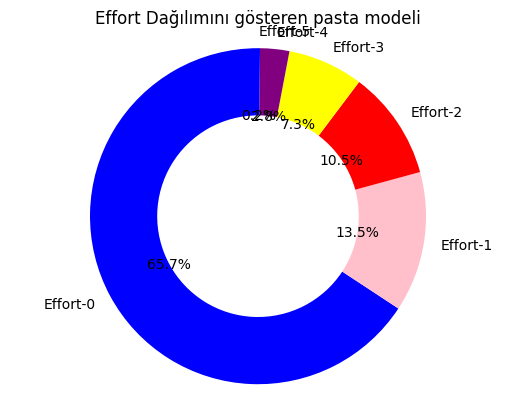

In [8]:
sizes = df['effort'].value_counts()
labels = [f"Effort-{i}" for i in sizes.index]
colors = ["blue", "pink", "red", "yellow", "purple"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, wedgeprops=dict(width=0.4))
plt.axis("equal")
plt.title("Effort Dağılımını gösteren pasta modeli")
plt.show()

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

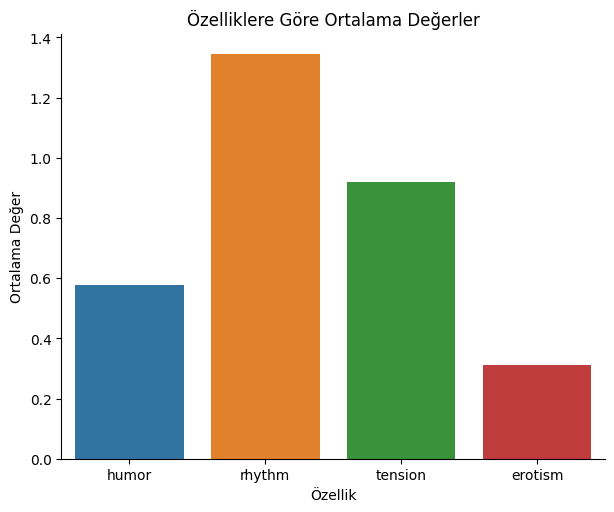

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Excel dosyasından veriyi yükleyin
df = pd.read_excel('filmtv_movies.xlsx')

# 'humor', 'rhythm', 'tension', 'erotism' sütunlarındaki değerlere göre ortalama değerleri alın
df_means = df[['humor', 'rhythm', 'tension', 'erotism']].mean()

# Gruplandırılmış veriyi çatıplot ile görselleştirin
plt.figure(figsize=(12, 6))
ax = sns.catplot(data=df_means.reset_index(), x='index', y=0, kind='bar', aspect=1.25)
plt.xlabel('Özellik')
plt.ylabel('Ortalama Değer')
plt.title('Özelliklere Göre Ortalama Değerler')
plt.show()
